Purpose: plot images and corresponding masks from a given database for visual assessment.

Input: path to the folder, containing database (uncomment, when needed).

In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data
from torch.utils.data import DataLoader
from db_load_pytable import LoadPyTable

In [2]:
# ## Provide path to the folder, containing the database
# path = ''

## Load the database, using pytorch dataloader;
## Specify whether to shuffle the data;
dataset = LoadPyTable('example_database') ## otherwise: path + 'database name'
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 4, shuffle = True)

## List all available image and mask batches;
## Output: list of tuples (integer, [image_batch, mask_batch]);
batch_list = list(enumerate(dataloader))

Current batch number:  0
Image batch dimensions: torch.Size([4, 1, 336, 336]), mask batch dimensions: torch.Size([4, 1, 336, 336])


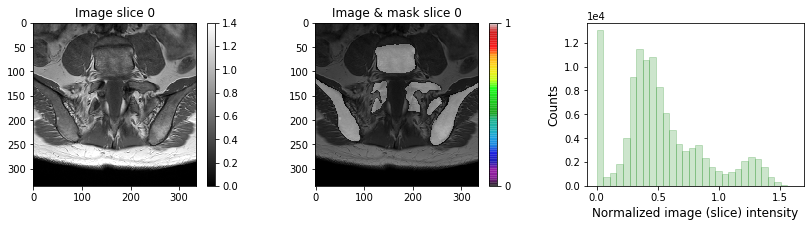

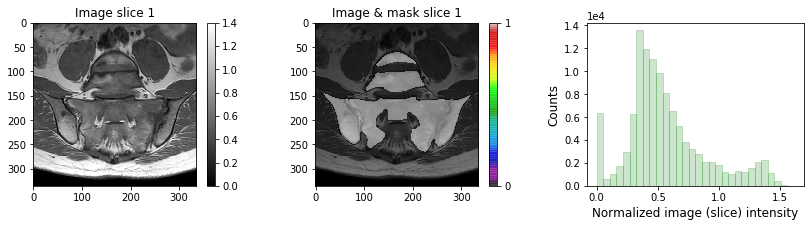

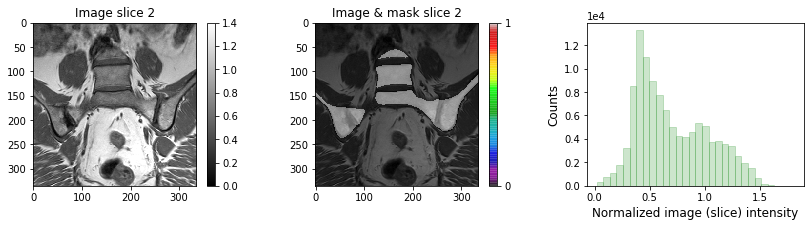

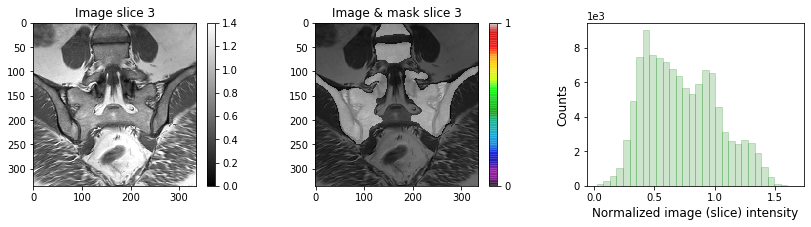

In [3]:
## Visualise samples (T1W image slices and corresponding masks of disease region);

## Choose number of batches, samples of which to visualize;
n = 1## len(batch_list) ## if all

#### ------------------------------------------------------------ Loop over image/mask batches 
for i in range(n):
    
    ## Choose image and corresponding mask batch from the list, in the order or at random;
    index = i#np.random.randint(low = 0, high = len(batch_list)) ## otherwise: i
    
    print('Current batch number: ', index)
    
    ## Retrieve current image and mask batches from the batch list
    image_batch, mask_batch = batch_list[index][1]
    
    ## Output image and mask batch dimensions
    print('Image batch dimensions: %s, mask batch dimensions: %s'%(image_batch.shape,
                                                                   mask_batch.shape))
    
    #### ------------------------------------------ Loop over image/mask slices in the batch
    for k in range(image_batch.shape[0]):
        
        ## Retrieve image and corresponding mask slice;
        image_slice, mask_slice = image_batch[k,0,:,:], mask_batch[k,0,:,:]
        
        ## Convert image array to 1D array to plot the histogram;
        flatten_array = image_slice.flatten()
        
        ## Plot image and corresponding mask slices, image intensity histogram;
        plt.figure(figsize = (14,3))
        
        ## Current image slice;
        plt.subplot(131)
        plt.imshow(image_slice, cmap = 'gray')
        plt.title('Image slice %s'%k, fontsize = 12)
        plt.colorbar()
        plt.clim([0,1.4])## fix display intensity range;
        
        ## Current image and super-imposed mask slice;
        plt.subplot(132)
        plt.imshow(image_slice, cmap = 'gray')
        plt.imshow(mask_slice, cmap = 'nipy_spectral', alpha = 0.5)
        plt.title('Image & mask slice %s'%k, fontsize = 12)
        plt.colorbar(ticks = [0,1])
        
        ## Image slice intensity histogram;
        plt.subplot(133)
        counts, bins, _ = plt.hist(flatten_array, 30, fc = 'g', edgecolor = 'g', alpha = 0.2)
        plt.ylabel('Counts', fontsize = 12)
        plt.xlabel('Normalized image (slice) intensity', fontsize = 12)
        plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0,0))
        
        plt.subplots_adjust(wspace = 0.3)
        plt.show()
    #### ------------------------------------------------------------------------------------
#### ----------------------------------------------------------------- Loop over batches ends;